In [1]:
import numpy as np
from astropy.table import Table, Column, join
from astropy.coordinates import SkyCoord
from astropy.table import Column
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.wcs import WCS
from astropy.io import fits

from matplotlib.colors import LogNorm

from astropy.utils.data import download_file


#A100-NSA Catalog
myTab=Table.read('a100-nsa-for-adap.fits')

In [2]:
# SNR cut: GALEX NUV or WISE 12um SNR > 20
snrmin = 20
W3snr = myTab['w3_nanomaggies']
W3snr_ivar = myTab['w3_nanomaggies_ivar']
W3snr = W3snr*np.sqrt(W3snr_ivar)
W3flag = (W3snr>snrmin) | (myTab['W3SNR']>snrmin)  
GALEXsnr = myTab['NMGY'][:,1]
GALEXsnr_ivar = myTab['NMGY_IVAR'][:,1]
GALEXsnr = GALEXsnr*np.sqrt(GALEXsnr_ivar)
NUVflag = GALEXsnr>snrmin
SNRflag = W3flag | NUVflag

In [3]:
# Size cut: r-band effective radii greater than two pixels (> 6.500" ) in the unWISE images
radmin = 5.500
rad_eff1 = myTab['SERSIC_TH50']
rad_eff2 = myTab['petroR50_r']
sizeflag = (rad_eff1>radmin) | (rad_eff2>radmin)

In [4]:
# Redshift cut: 0.002 < z < 0.025
zmin=0.002
zmax=0.025
redshift = myTab['ZDIST']
vhelio = myTab['Vhelio']
redshiftflag = (redshift>zmin) & (redshift<zmax)
vhelioflag = (vhelio>(zmin*3e5)) & (vhelio<(zmax*3e5))
zflag = redshiftflag | vhelioflag 

In [5]:
# Apply cuts
NSFcut = SNRflag & sizeflag & zflag
cuttab=myTab[NSFcut]
cuttab.columns

<TableColumns names=('AGC','Name','OrigSrcName','HISrcName','RAdeg_HI','DECdeg_HI','RAdeg_OC','DECdeg_OC','RAdeg_Use','DECdeg_Use','Vhelio','sigV','W50','sigWtot','sigWstat','W20','HIflux','sigflux','SNR','RMS','Dist','sigdist','logMH','siglogMH','HIcode','objID_1','parentID','specObjID','ra_1','dec_1','modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','modelMagErr_u','modelMagErr_g','modelMagErr_r','modelMagErr_i','modelMagErr_z','cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z','cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i','cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z','petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z','petroRad_u','petroRad_g','petroRad_r','petroRad_i','petroRad_z','petroR50_g','petroR50_r','petroR50_i','petroR90_g','petroR90_r','petroR90_i','extinction_u','extinction_g','extinction_r','extinction_i','extinction_z','expAB_g','expAB_r','expAB_i','ex

In [16]:
#cuttab.info

In [7]:
#cuttab['logMstarTaylor']
#cuttab['ABSMAG'][:,5]
#cuttab['absMag_i']

13756


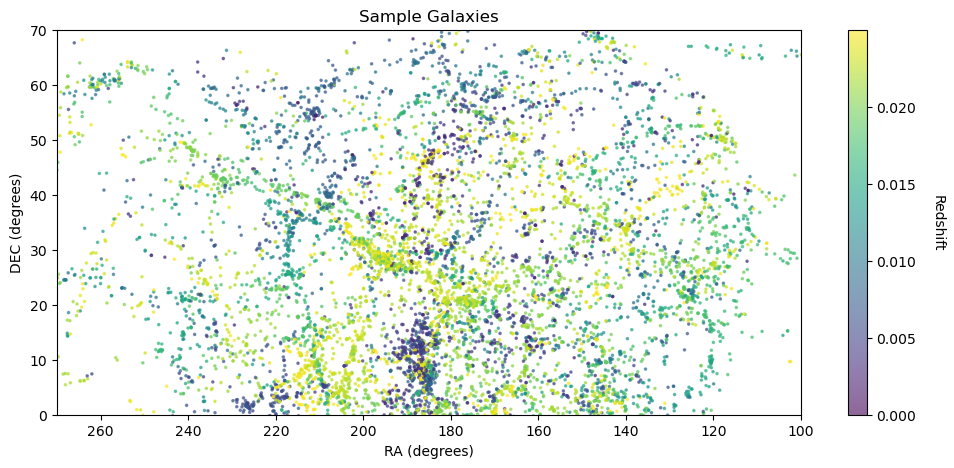

In [8]:
#Define positional and color data
ra = cuttab['RA']
dec = cuttab['DEC']
ccode = cuttab['ZDIST']

#Print number of points
print(len(ra))

#Plot RA vs DEC and color it by recessional velocity
plt.figure(figsize=(12,5))
plt.scatter(ra,dec,c=ccode,cmap='viridis',alpha=0.6,s=2.5)
plt.xlim(reversed(plt.xlim()))
plt.title('Sample Galaxies')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.xlim(270,100)
plt.ylim(0,70)
cbar = plt.colorbar()
cbar.set_label('Redshift',rotation=270,labelpad=20)

C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_14244\1401204150.py:5: RuntimeWarning: divide by zero encountered in log10
  npx = np.array(np.log10(x1))


13756


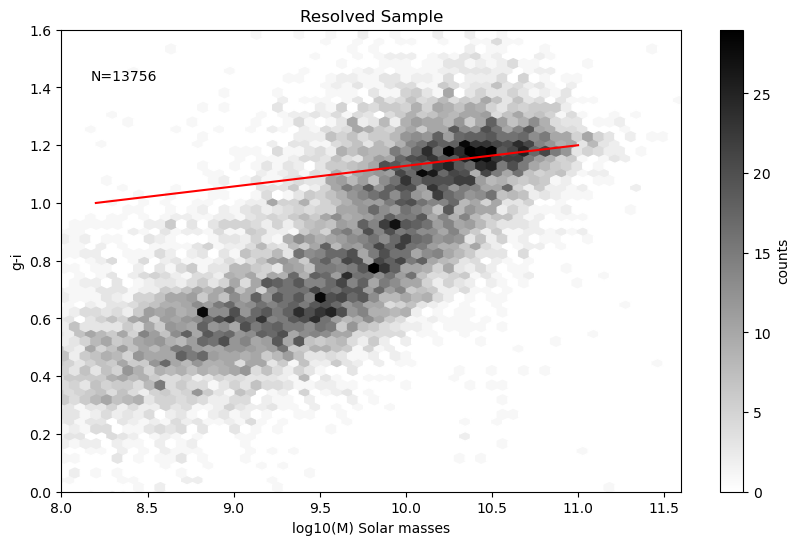

In [19]:
x1 = cuttab['MASS']
y1 = cuttab['ABSMAG'][:,3] - cuttab['ABSMAG'][:,5] #g-i magnitudes, FNUGRIZ- G[:,3] & I[:,5]

#Put x and y into numpy arrays
npx = np.array(np.log10(x1)) 
npy = np.array(y1)

#Prints sample size
print(len(npx))

#Figure size
fig,ax = plt.subplots(figsize=(10, 6))

#Hexbin parameters
hb = ax.hexbin(npx,npy,gridsize=[150,850],bins=30,cmap='gray_r')

#Plot hexbin mass vs color diagram
plt.title('Resolved Sample')
ax.set(xlim=(8,11.6),ylim=(0,1.6)) 
fig.colorbar(hb, label='counts') 
plt.xlabel('log10(M) Solar masses') 
plt.ylabel('g-i')

#Plot Red Sequence line
xx=np.array([8.2 ,11])
yy=np.array([ 1,  1.2])
plt.plot(xx,yy,color='r')
plt.text(0.1,0.9,'N=13756',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

plt.show()

C:\Users\EvanB.LAPTOP-8CHCIOMA\AppData\Local\Temp\ipykernel_14244\4138955129.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(x),y,s=4,color='black')


13756


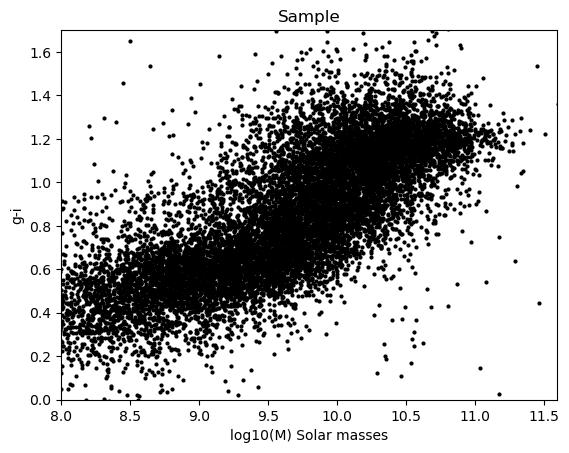

In [34]:
x = cuttab['MASS']
y = cuttab['ABSMAG'][:,3] - cuttab['ABSMAG'][:,5] #cuttab['gmi_Shao']

#Plot mass vs color without hexbin
plt.title('Sample')
plt.scatter(np.log10(x),y,s=4,color='black')
plt.ylim(0,1.7)
plt.xlim(8,11.6)
plt.xlabel('log10(M) Solar masses')
plt.ylabel('g-i')
print(len(cuttab['gmi_corr']))

In [35]:
#New sizeflag for histogram
radmin1 = 55
rad_eff11 = myTab['SERSIC_TH50']
rad_eff21 = myTab['petroR50_r']
sizeflag1 = (rad_eff11>radmin1) | (rad_eff21>radmin1)

#New cut dataset
r3size = SNRflag & sizeflag1 & zflag
cut3 = myTab[r3size]

#New cut dataset
cut = SNRflag & zflag
tab=myTab[cut]

#Making arrays of 90% petrosian radii
p901 = np.array(tab['PETROTH90'])
p902 = np.array(cuttab['PETROTH90'])
p903 = np.array(cut3['PETROTH90']) #np.array(tab['PETROTH90'])

#Setting lower bounds
p1 = (p901 != 0)
p2 = (p902 > 1.7)
p3 = (p901 > 17.4)

#Applying bounds to arrays
p90_01 = p901[p1]
p90_02 = p902[p2]
p90_03 = p903[p3]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 344 but corresponding boolean dimension is 17289

In [30]:
#Half light radii
petroR501=tab['SERSIC_TH50']
petroR502=cuttab['SERSIC_TH50']

#Arrays of half light radii
p501 = np.array(tab['SERSIC_TH50'])
p502 = np.array(cuttab['SERSIC_TH50'])

#Lower bounds
c1 = (p501 > 0)
c2 = (p502 > 0)

#Applies lower bounds to arrays
p50_01 = p501[c1]
p50_02 = p502[c2]

13294


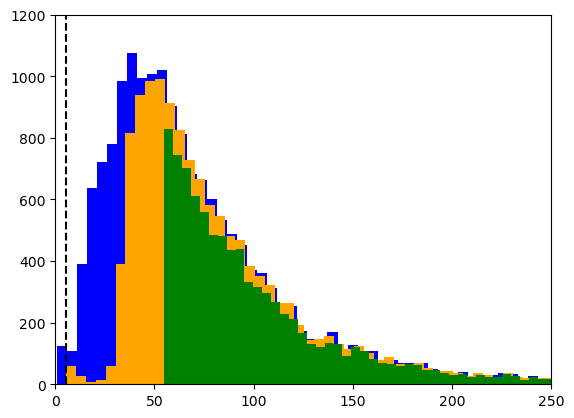

In [31]:
#Plot histogram of 3.16 times the 90% petrosian radii
plt.hist(3.16*p90_01,bins=95,color='blue') #3.16*
plt.hist(3.16*p90_02,bins=95,color='orange')
plt.hist(3.16*p90_03,bins=95,color='green')
plt.axvline(x = 5.5, color = 'black', linestyle='dashed')
plt.ylim(0,1200)
plt.xlim(0,250)

#Sample size
print(len(p90_02))

13396


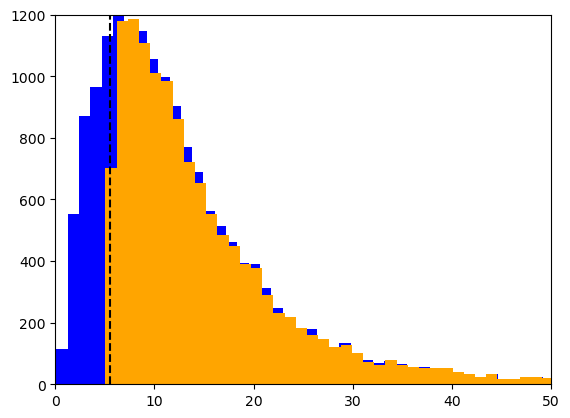

In [32]:
#Plot histogram of half light radii
plt.hist(p50_01,bins=140,color='blue')
plt.hist(p50_02,bins=140,color='orange')
plt.axvline(x = 5.5, color = 'black', linestyle='dashed')
plt.xlim(0,50)
plt.ylim(0,1200)

#Sample size
print(len(p50_02))